In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from wordcloud import WordCloud
from sklearn.utils import resample
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [2]:
# data cleaning by using the re library
def clean_text(data, tweet):
    temp = 0;
    data[tweet] = data[tweet].str.lower()
    data[tweet] = data[tweet].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|(\w+:\/\/\S+) | \n |  | \t", "", elem))
    return data

In [9]:
if __name__ == "__main__":
    #reading the datasets
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')

In [10]:
    #clean noises from data by colum
    testClean = clean_text(test, "tweet")
    testData = test['tweet']
    trainClean = clean_text(train, "tweet")
    trainData = train['tweet']

    testClean.dropna()
    trainClean.dropna()
    testData.dropna()

0        #studiolife #aislife #requires #passion #dedic...
1          #white #supremacists want everyone to see th...
2        safe ways to heal your #acne!!#altwaystoheal #...
3        is the hp and the cursed child book up for res...
4        3rd #bihday to my amazing, hilarious #nephew e...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my song "so glad" free download!#shoegaze #new...
Name: tweet, Length: 17197, dtype: object

   id  label                                              tweet
0   1      0    when a father is dysfunctional and is so sel...
1   2      0    thanks for #lyft credit i can't use cause th...
2   3      0                                bihday your majesty
3   4      0  #model i love u take with u all the time in ur...
4   5      0                 factsguide: society now#motivation
   id  label                                              tweet  text length
0   1      0    when a father is dysfunctional and is so sel...           95
1   2      0    thanks for #lyft credit i can't use cause th...          108
2   3      0                                bihday your majesty           19
3   4      0  #model i love u take with u all the time in ur...           82
4   5      0                 factsguide: society now#motivation           35


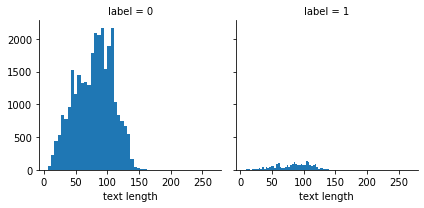

In [11]:
    print(trainClean.head())
    #graph of number of sentence and their size between the callses 0\1 
    trainClean['text length'] = trainClean['tweet'].apply(len)
    graph = sns.FacetGrid(data=trainClean, col='label')
    graph.map(plt.hist, 'text length', bins=50)

    print(trainClean.head())


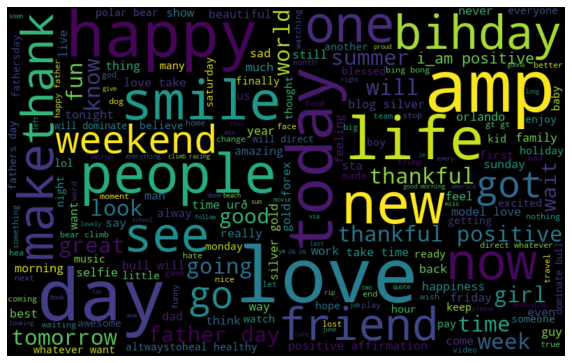

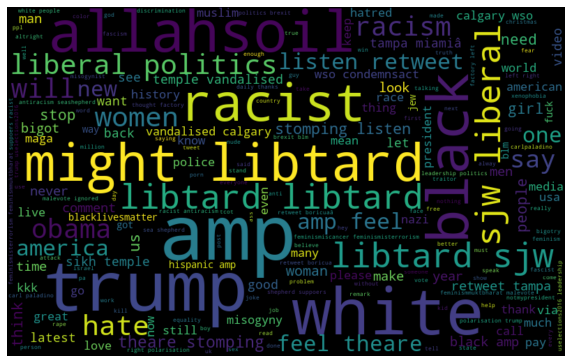

In [12]:
    #plot normal words from the data
    hatred_words = ' '.join([text for text in trainClean['tweet'][trainClean['label'] == 0]])
    wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(hatred_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

    #plot hate words from the data
    hatred_words = ' '.join([text for text in trainClean['tweet'][trainClean['label'] == 1]])
    wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(hatred_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

(29720, 4)
(2242, 4)
(29720, 4)
(59440, 4)


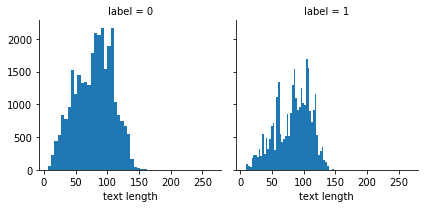

In [13]:
    #Fixing imbalance in data
    trainNonHate = trainClean[trainClean.label==0]

    print(trainNonHate.shape)
    trainHate = trainClean[trainClean.label==1]
    print(trainHate.shape)
    trainHateResample = resample(trainHate, replace=True, n_samples=len(trainNonHate), random_state=111)
    print(trainHateResample.shape)
    trainReShape = pd.concat([trainHateResample, trainNonHate])
    print(trainReShape.shape)
    trainReShape['label'].value_counts()

    trainReShape['text length'] = trainReShape['tweet'].apply(len)
    graph = sns.FacetGrid(data=trainReShape, col='label')
    graph.map(plt.hist, 'text length', bins=50)

In [18]:
    # we will use the Scikit-Learn’s pipeline with an DecisionTreeClassifier,
    # before training our model
    pipeline_nb = Pipeline([
        #used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.
        ('countvect', CountVectorizer()),
        ('dtc', DecisionTreeClassifier())
    ])

    #split the data into a training set and a test set

    X_train, X_test, y_train, y_test = train_test_split(trainReShape['tweet'],trainReShape['label'],random_state = 1)

    # train the model and predict the results on the test set using the F1 score method
    model = pipeline_nb.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(f"DecisionTreeClassifier: {f1_score(y_test, y_predict)}")
    acc = f1_score(y_test, y_predict)


DecisionTreeClassifier: 0.9720591082144932


In [15]:
    #MultinomialNB
    pipeline_nb2 = Pipeline([
        ('countvect', CountVectorizer()),
        ('dtc', MultinomialNB())
    ])

    X1, X2, y1, y2 = train_test_split(trainReShape['tweet'], trainReShape['label'], random_state=1)

    model2 = pipeline_nb2.fit(X1, y1)
    y_predict = model2.predict(X2)
    print(f"MultinomialNB: {f1_score(y2, y_predict)}")
    acc2 = f1_score(y2, y_predict)


MultinomialNB: 0.9608490260790784


In [17]:
    #RandomForestClassifier
    pipeline_nb3 = Pipeline([
        #used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.
        ('countvect', CountVectorizer()),
        ('dtc', RandomForestClassifier())
    ])

    X3, X4, y3, y4 = train_test_split(trainReShape['tweet'], trainReShape['label'], random_state=1)

    # train the model and predict the results on the test set using the F1 score method
    model3 = pipeline_nb3.fit(X3, y3)
    y_predict = model3.predict(X4)
    print(f"RandomForestClassifier: {f1_score(y4, y_predict)}")
    acc3 = f1_score(y4, y_predict)

RandomForestClassifier: 0.9976819656930923


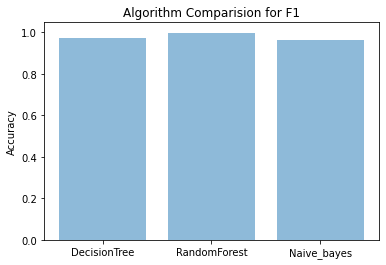

In [19]:
    #plots accuracy of all models
    objects = ('DecisionTree', 'RandomForest', 'Naive_bayes')
    y_pos = np.arange(len(objects))
    performance = [acc,acc3,acc2]
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Accuracy')
    plt.title('Algorithm Comparision for F1')
    plt.show()


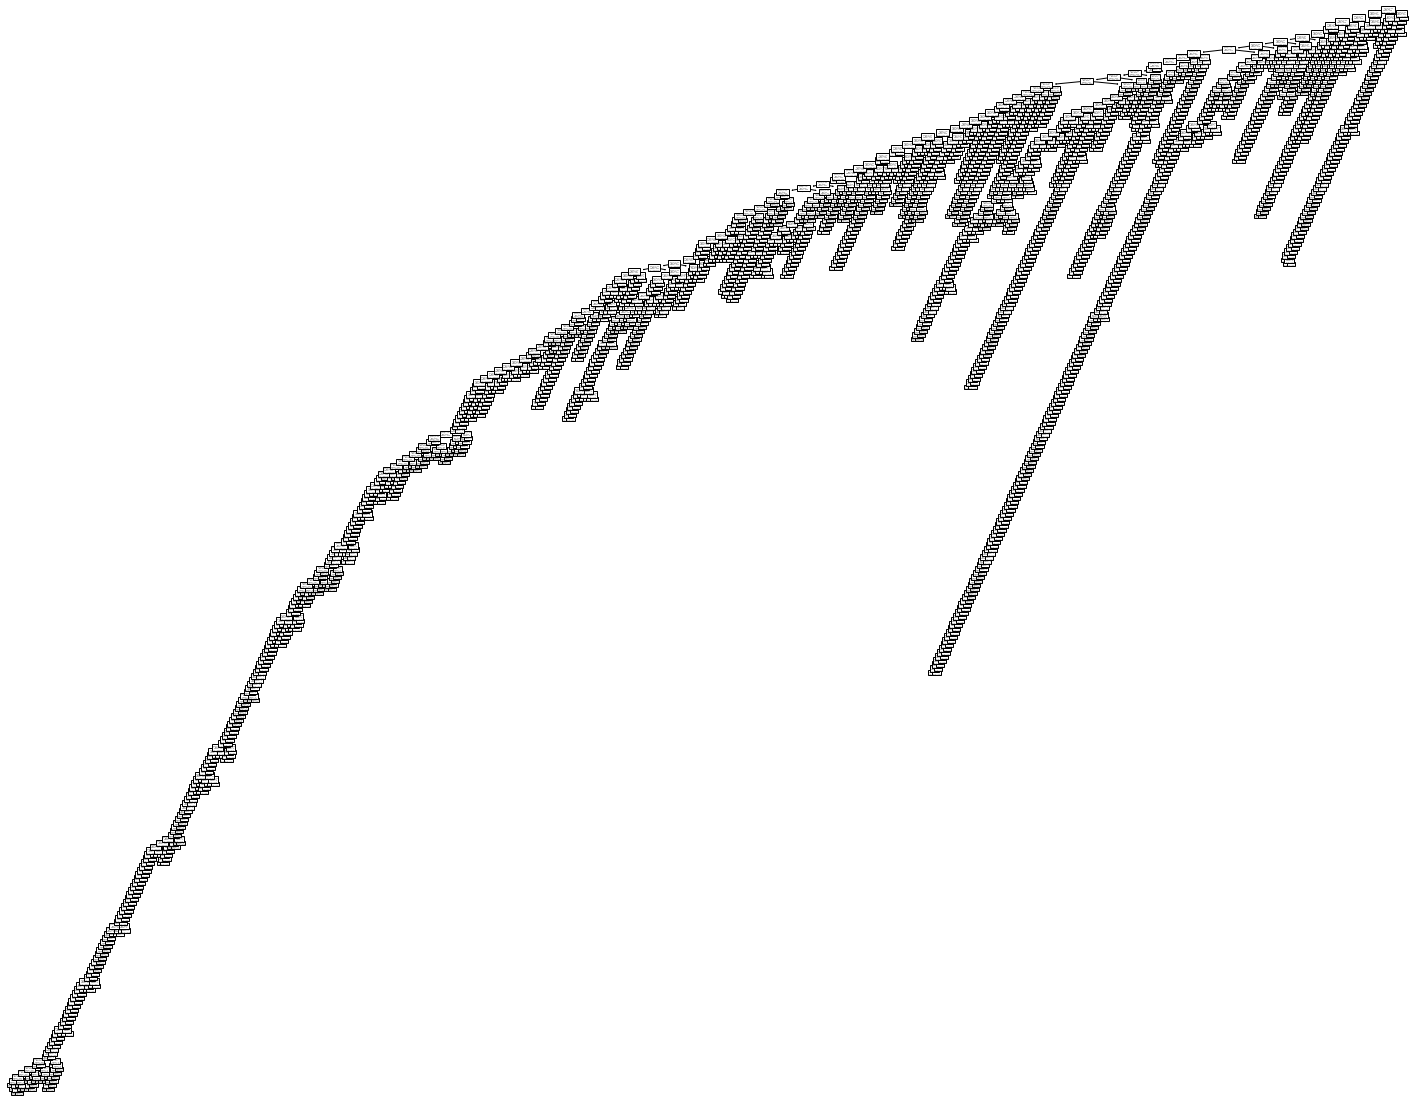

In [20]:
    #plot the decision tree

    fig = plt.figure(figsize=(25, 20))
    plot_tree(pipeline_nb['dtc'])
    plt.show()
  